# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #5CB2AC; text-align: center; line-height: 1.25;"><b>US Car Accidents<span style="color: #000000"> Analysis and Prediction</span></b><br><span style="color: #5CB2AC; font-size: 24px">ECS 171 Final Project</span></h1>
[//]: # (-.- .unlisted .unnumbered)

> **Notes**
> * **Colab Link**: [Click here](https://colab.research.google.com/drive/1AqbJA3umP6qhSGoXuhuWKKh4dS5_917D?usp=sharing)
> * **HTML Link**: [Click here]()
> * **Authors:** Yinyin Guan, Randy Li, Shuying Li, Zuge Li, Hugo Lin, Jianfeng Lin

# <div style="font-family: Trebuchet MS; background-color: #5CB2AC; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Introduction </div>

<font size="4"><b> Utilizing the car accidents that covered 49 states of the USA, the purpose of this project is to explore the independent variables, such as weather, humidity, wind speed, weather condition etc, to see whether they have significant impact to the cars severity, and develop reliable models to predict the cars severity in accidents. </b></font>

More details in `README.md`

# <div style="font-family: Trebuchet MS; background-color: #5CB2AC; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Project </div>

<div class="warning" style='background-color:#c3e3e0; color: #000000; border-left: solid #5CB2AC 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em'>
<b>Workflow:</b></p>
<p style='margin-left:1em;'

1. Jupyter Notebook Data Download and environment Setup
2. Initial Data Explorations
3. Methods
   * EDA
   * Data Preprocessing
   * Model Implementations
6. Discussion and Conclusion
7. Collaboration
</p><p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##  <div style="font-family: Trebuchet MS; background-color: #9ed9d4; color: #FFFFFF; padding: 12px; line-height: 1.5; border-left: solid #5CB2AC 4px; border-radius: 5px">Jupyter Notebook Data Download and environment Setup</div>

In [ ]:
# Basics
import pandas as pd
import numpy as np
import warnings
import os

# Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.patches as patches
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import pip
import sys
import copy

# Models
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import plotly.express as px
import matplotlib.ticker as mtick
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Install some unusual packages
try:
    packages = ['kaleido','missingno']
    for p in packages:
        if not p in sys.modules:
            pip.main(['install', p])
except:
    pass

# Import unusual packages
import missingno

# Colors
colors = ['#FFB703', '#219EBC', '#023047', '#FFB703', '#FB8500']

# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set_style('white')
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
plt.rcParams["font.family"] = "serif"

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Check unusual packages 
# Since our dataset is huge we will not directly unzip the zip file instead we directly download csv file

if not os.path.exists('US_Accidents_Dec21_updated.csv'):
    if 'gdown' in sys.modules:
      __import__('gdown')
    else:
      pip.main(['install', 'gdown'])
      import gdown

    file_id = '1d4mIF-MTblf-zbQOXlCmZyoLMqGACjzH'
    output = "US_Accidents_Dec21_updated.csv"
    gdown.download(
        f"https://drive.google.com/uc?export=download&confirm=pbef&id={file_id}",
        output
    )
    print('Download Completed!')
else:
    print('Already have dataset!')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1d4mIF-MTblf-zbQOXlCmZyoLMqGACjzH
To: /content/US_Accidents_Dec21_updated.csv
100%|██████████| 1.15G/1.15G [00:11<00:00, 99.3MB/s]

Download Completed!


In [ ]:
# Read data
data = pd.read_csv('US_Accidents_Dec21_updated.csv', encoding = "latin-1")
# For graphing purpose
data1 = data.copy()
data1['Start_Time'] = pd.to_datetime(data1['Start_Time'])

## <div style="font-family: Trebuchet MS; background-color: #9ed9d4; color: #FFFFFF; padding: 12px; line-height: 1.5; border-left: solid #5CB2AC 4px; border-radius: 5px">Initial Data Exploration</div>

In [ ]:
# Preview of dataset
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# Check the number of observations and featuers
data.shape

(2845342, 47)

In [ ]:
# Check the types of each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Since there are lots of feactures in this dataset, we may need to delete some uncessary feacutres in the latter step.

In [ ]:
# Describe of the numerical data
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


### Check how many labels exist missing value

In [ ]:
data.isna().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

#### Check the misssing percentage

In [ ]:
percentage = (data.isna().sum().sort_values(ascending = False) / len(data)) * 100
percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

### Missing / Nan values graph

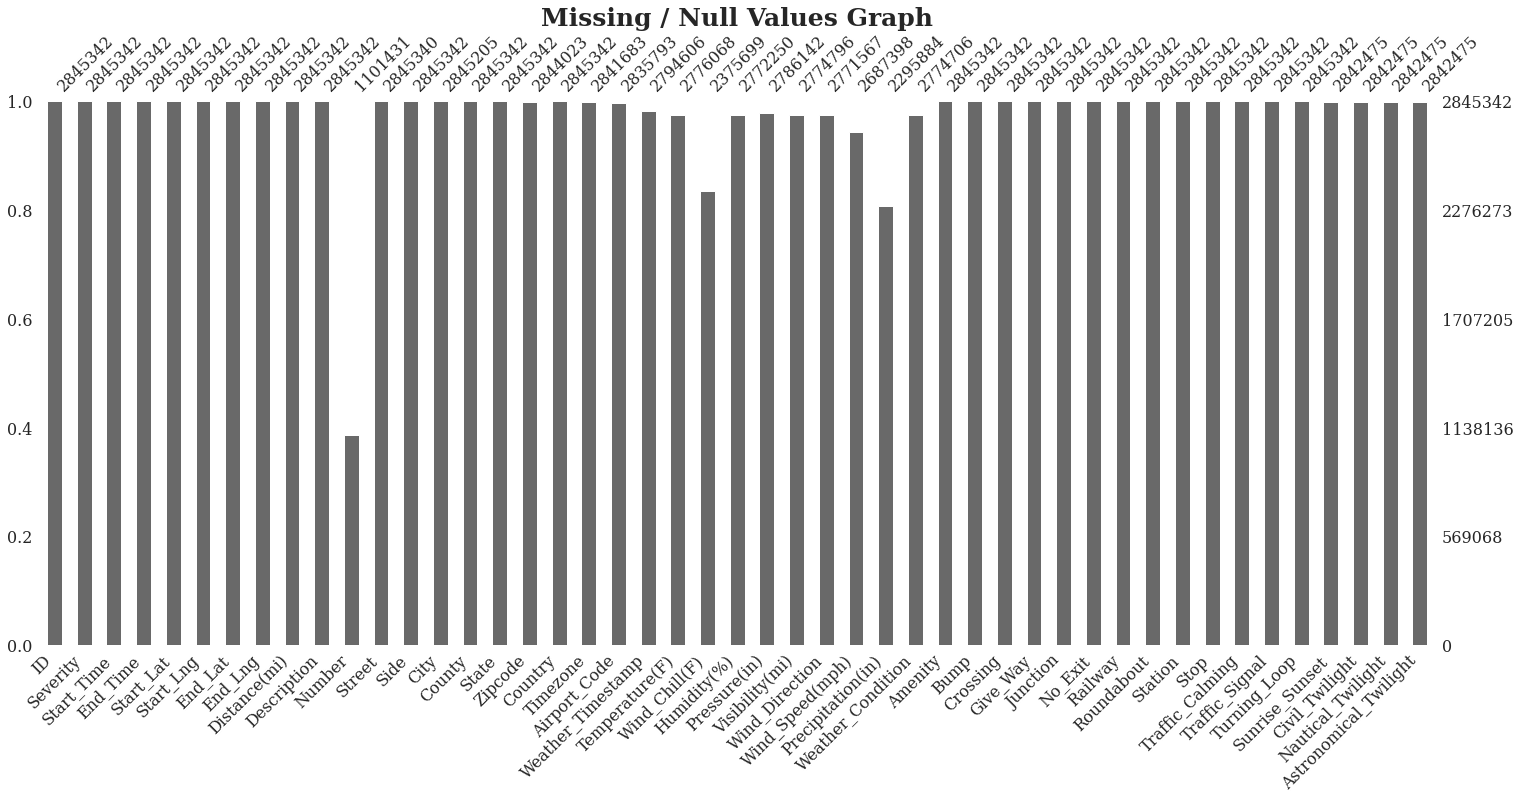

In [ ]:
import missingno as msno
msno.bar(data);
plt.title('Missing / Null Values Graph', fontweight='heavy', ha='center', fontsize=25)
plt.show()

## <div style="font-family: Trebuchet MS; background-color: #9ed9d4; color: #FFFFFF; padding: 12px; line-height: 1.5; border-left: solid #5CB2AC 4px; border-radius: 5px">EDA</div>

### Number of Car Accidents Analysis

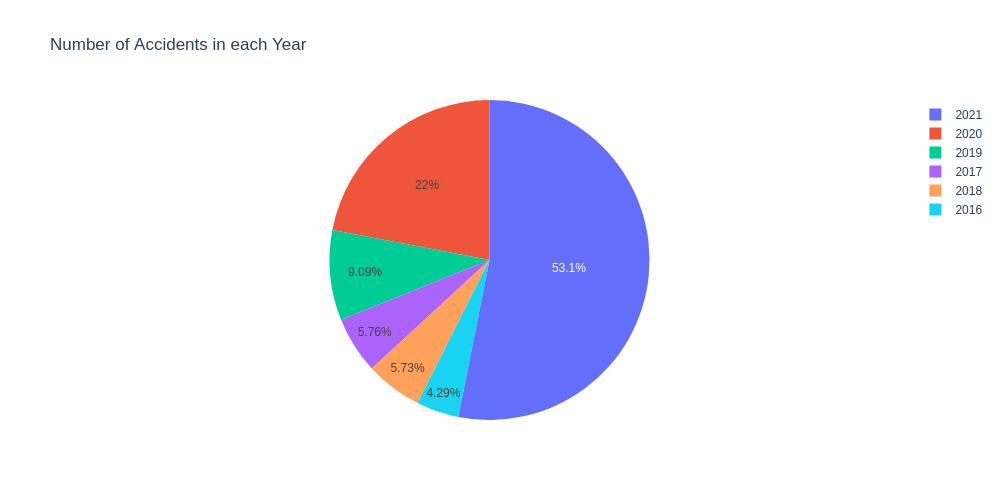

In [ ]:
# Number of Accidents in each year
data1['Year'] = data1.Start_Time.dt.year

dates_counts = pd.DataFrame(data1['Year'].value_counts())

fig = go.Figure(go.Pie(
    values = dates_counts['Year'],
    labels = dates_counts.index,
    hovertemplate = "Year: %{label}: <br>Number of Accidents: %{percent} </br><extra></extra>"))

fig.update_layout(
    title="Number of Accidents in each Year",width = 1000,height = 500)

fig.show("png")

In each year, the numbers of car accidents is increasing.

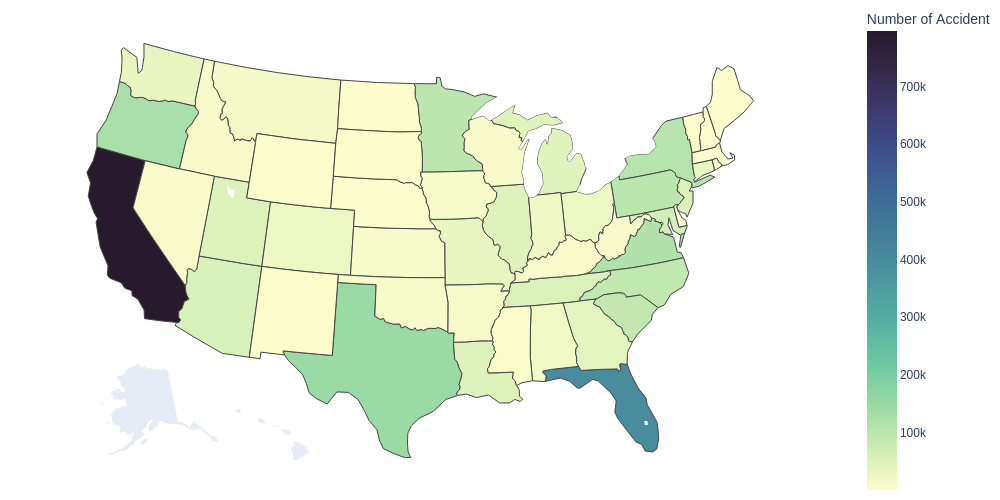

In [ ]:
# Map plot
State_with_most_accident = data['State'].value_counts()

fig = go.Figure(data=go.Choropleth(locations=State_with_most_accident.index,
    z = State_with_most_accident.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'deep',
    colorbar_title = "Number of Accident"))

fig.update_layout(mapbox_style="light",
      geo_scope='usa',
      margin={"r":0,"t":0,"l":0,"b":0},
      dragmode=False, width = 1000,height = 500)

fig.update_traces(customdata=State_with_most_accident.index,
                    hovertemplate= ('State: %{customdata}<br>' + 
                                    'Number of Accident: %{z:.2f}<br>' + 
                                    '<extra></extra>'))

fig.show("png")

Based on the above graph, we can see that California from February 2016 to Dec 2021 has the highest number of car accidents, which is surprised for us.

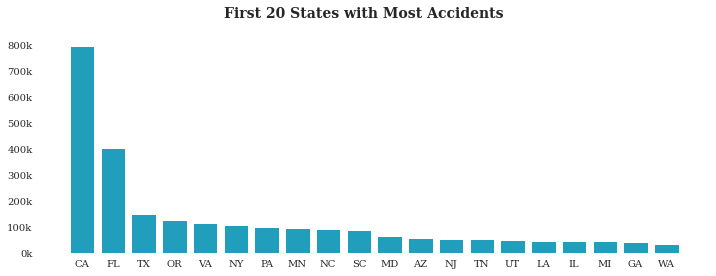

In [ ]:
# To 20 states with most accidents graph
State_with_most_accident = data['State'].value_counts().rename_axis('States').to_frame('Counts')
fig, ax = plt.subplots()
fmt = '{x:,.0f}k'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
fig.set_size_inches(12, 4)
ax.bar(State_with_most_accident.index[:20],(State_with_most_accident['Counts'][:20])/1000,
       align='center',color = colors[1])
plt.suptitle('First 20 States with Most Accidents', fontweight='heavy', 
             ha='center', fontsize=14) 
plt.show();

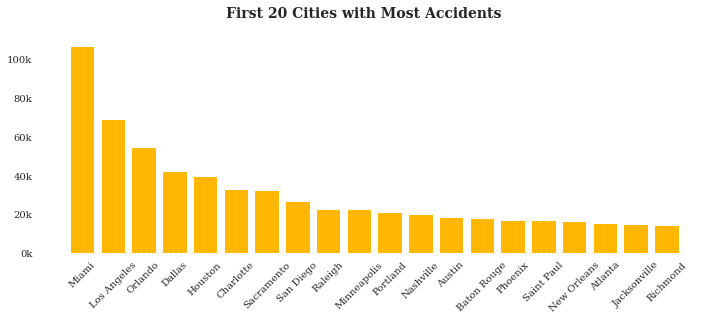

In [ ]:
# To 20 cities with most accidents graph
# sticker reference: 
# https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels

fig, ax = plt.subplots()
fmt = '{x:,.0f}k'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

City_with_most_accident = data['City'].value_counts().rename_axis('States').to_frame('Counts')

fig.set_size_inches(12, 4)
ax.bar(City_with_most_accident.index[:20],(City_with_most_accident['Counts'][:20]/1000),
       align='center',color = colors[3])
plt.suptitle('First 20 Cities with Most Accidents', fontweight='heavy', 
             ha='center', fontsize=14) 
plt.xticks(rotation=45)
plt.show();

Since Miami and Los Angeles have similar weathers (especially for sunny days), we start to hypothesize that if numbers of car accidents are relative to weathers.

### Accident Severity Analysis

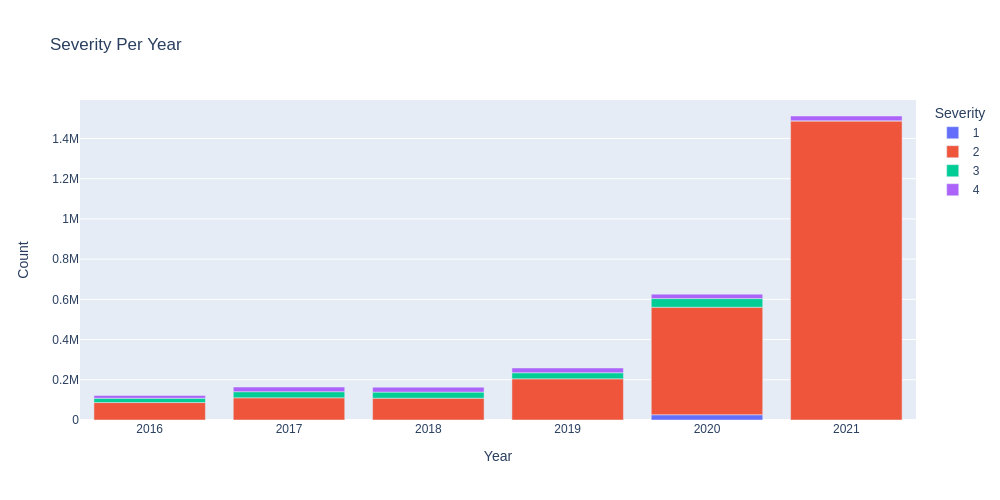

In [ ]:
# Severity Per year
severity_year_counts = data1.groupby(['Year', 'Severity']).size().unstack(fill_value=0)
severity_year_counts = pd.DataFrame(severity_year_counts).reset_index()
severity_year_counts = severity_year_counts.melt(id_vars=["Year"], var_name="Severity", value_name="Count")

fig = px.bar(severity_year_counts, x ="Year", y='Count',color='Severity', 
             title="Severity Per Year",width = 1000,height = 500)
fig.show("png")

From 2016 to 2021, we can see that most car accidents are level 2 severity.

### Other Analysis

#### Duration Range

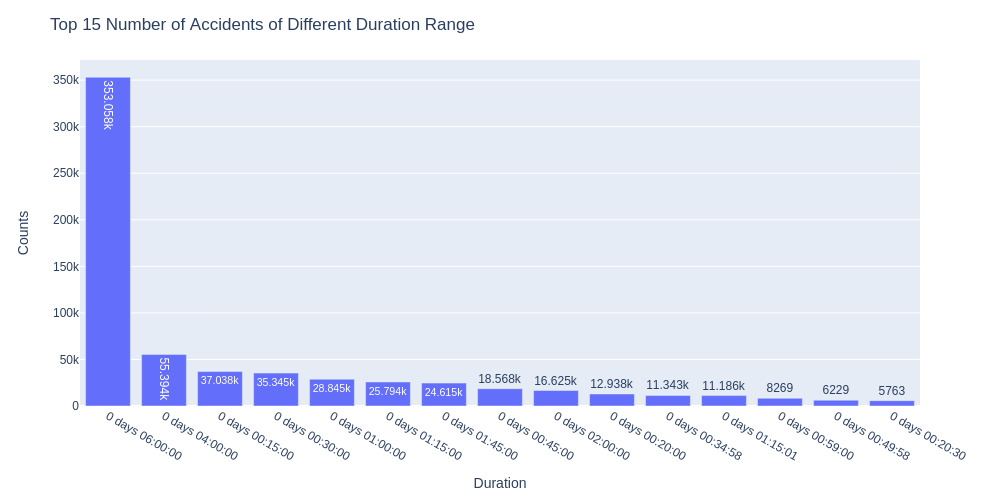

In [ ]:
# Time range
data['End_Time'] = pd.to_datetime(data['End_Time'])
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Duration'] = data.End_Time - data.Start_Time

# Time range graph
duration_counts = data.Duration.value_counts()[:15]
ax0 = pd.DataFrame(duration_counts)
ax0 = ax0.reset_index()
ax0.columns = ['Duration','Counts']
ax0['Duration'] = ax0['Duration'].astype('str')

fig = px.bar(ax0, x='Duration', y='Counts',text_auto=True,width = 1000,height = 500)

fig.update_layout(
    title="Top 15 Number of Accidents of Different Duration Range")

fig.show("png")

#### Temperature Analysis

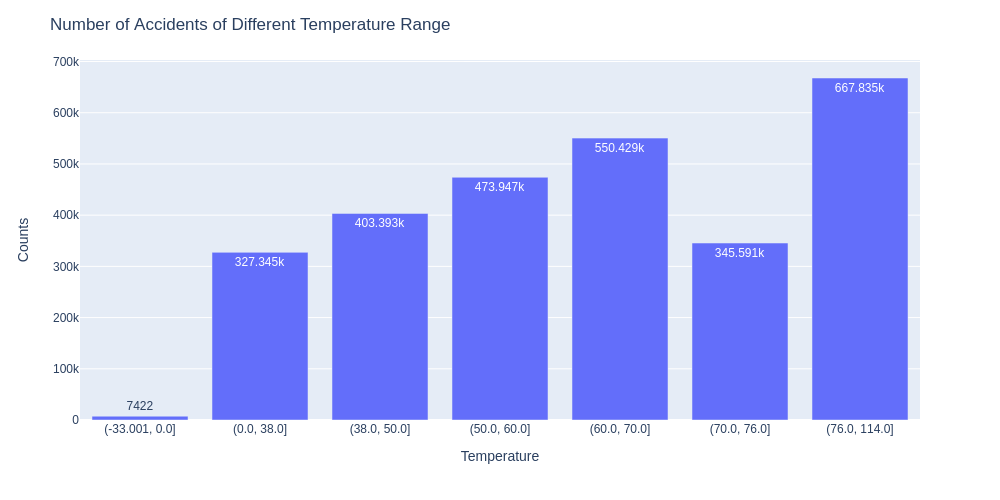

In [ ]:
# Number of Accidents of Different Temperature Range
out = pd.cut(data1['Temperature(F)'], bins=[-33, 0, 38, 50, 60, 70, 76, 114], include_lowest=True)
ax = out.value_counts(sort=False)
ax = ax.to_frame().reset_index()
ax.columns = ['Temperature','Counts']

ax['Temperature'] = ax['Temperature'].astype('str')
fig = px.bar(ax, x='Temperature', y='Counts',text_auto=True)

fig.update_layout(
    title="Number of Accidents of Different Temperature Range",width = 1000,height = 500)

fig.show("png")

In the temperature range, temperature from 76 to 114 ℉ has highest number of car accidents, which is interesting because it may be the possible reason why Log Angles and Miami have top 2 number of car accidents.

#### Humidity Analysis

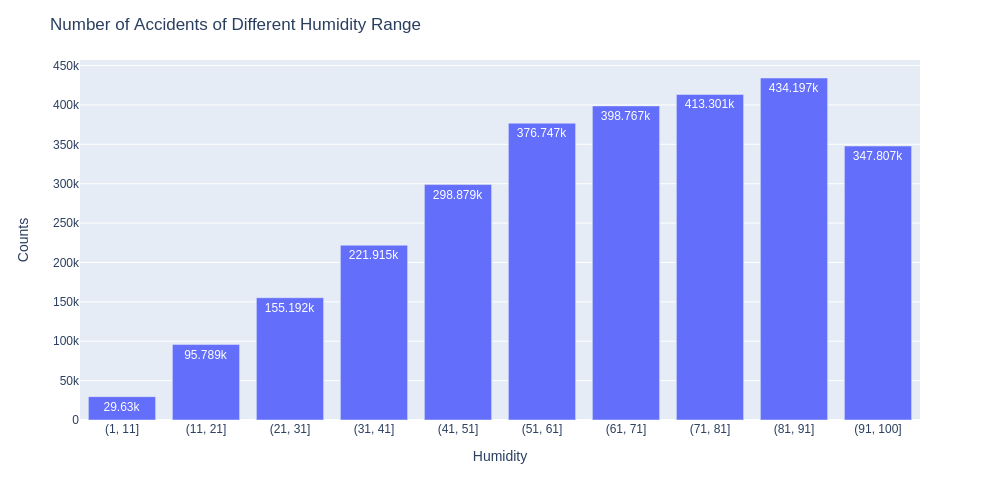

In [ ]:
# Number of accidents of different humidity range
out2 = pd.cut(data['Humidity(%)'], bins=[1,11,21,31,41,51,61,71,81,91,100], include_lowest=False)
ax2 = out2.value_counts(sort=False)
ax2 = ax2.to_frame().reset_index()
ax2.columns = ['Humidity','Counts']

ax2['Humidity'] = ax2['Humidity'].astype('str')
fig = px.bar(ax2, x='Humidity', y='Counts',text_auto=True)

fig.update_layout(
    title="Number of Accidents of Different Humidity Range",width = 1000,height = 500)

fig.show("png")

#### Weather Analysis

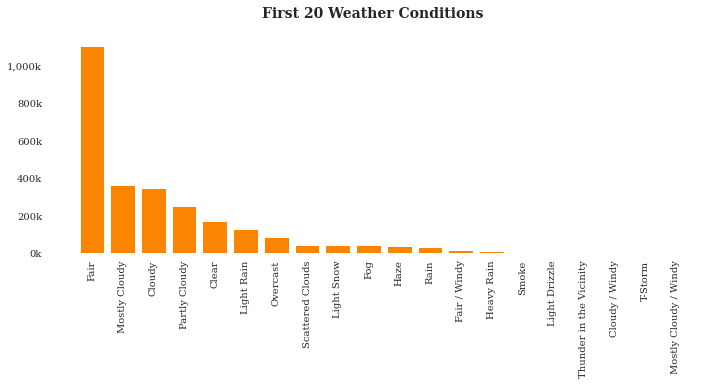

In [ ]:
# To 20 states with most accidents graph
State_with_most_accident = data['Weather_Condition'].value_counts().rename_axis('States').to_frame('Counts')
fig, ax = plt.subplots()
fmt = '{x:,.0f}k'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
fig.set_size_inches(12, 4)
ax.bar(State_with_most_accident.index[:20],(State_with_most_accident['Counts'][:20])/1000,
       align='center',color = colors[4])
plt.suptitle('First 20 Weather Conditions', fontweight='heavy', 
             ha='center', fontsize=14) 
plt.xticks(rotation=90)
plt.show();

## <div style="font-family: Trebuchet MS; background-color: #9ed9d4; color: #FFFFFF; padding: 12px; line-height: 1.5; border-left: solid #5CB2AC 4px; border-radius: 5px">Data preprocessing</div>

### Delete some uncessary variables:
1. ID
2. Description
3. Airport_Code
4. Timezone
5. Start_Time 
6. End_Time                
7.  Start_Lat              
8.  Start_Lng             
9.  End_Lat              
10. End_Lng
11. Street
12. Country
13. Weather_Timestamp
14. City
15. Zipcode



### Based on Null and missing values, we also will delete:
1. `Number`
2. `Precipitation(in)`
3. `Wind_Chill(F)`

<font size="3.5"><b> We decide to delete some categorical variables because they won't affect the severity of the car accidents. In addition, in order to futher explore the reason behind a car accident, we will add some new variables, such as the driving time and the terrain, which are consisting of the `Start_Time` ,`End_Time`, `Start_Lat`, `End_Lat`, `Start_lng` and `End_lng`. </b></font>

What's more, considering the percentage of missing value, we decide to delete any variables which its percentage is over 

In [ ]:
# new dataframe - drop columns
new_data = data.drop(['ID', 'Description', 'Airport_Code', 'Timezone', 'Start_Time',
                      'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 
                      'Street', 'Country', 'Weather_Timestamp', 'City', 'Zipcode', 
                      'Number', 'Precipitation(in)', 'Wind_Chill(F)', 'County'], axis = 1)

In [ ]:
# get time year
new_data['year'] = data['Start_Time'].dt.year

In [ ]:
# drop null values
new_data = new_data.dropna()

In [ ]:
# reset index
new_data = new_data.reset_index(drop=True)
new_data.head()

,Severity,Distance(mi),Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,year
0,3,3.230,R,OH,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0 days 06:00:00,2016
1,3,0.500,R,OH,37.0,93.0,29.69,10.0,WSW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00,2016
2,2,1.427,R,OH,35.6,100.0,29.66,10.0,WSW,8.1,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 06:00:00,2016
3,2,0.227,R,OH,33.8,100.0,29.63,3.0,SW,2.3,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00,2016
4,2,0.521,R,OH,33.1,92.0,29.63,0.5,SW,3.5,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00,2016


In [ ]:
# Recheck null values
new_data.isna().sum().sort_values(ascending = False)

Severity                 0
Distance(mi)             0
Duration                 0
Astronomical_Twilight    0
Nautical_Twilight        0
Civil_Twilight           0
Sunrise_Sunset           0
Turning_Loop             0
Traffic_Signal           0
Traffic_Calming          0
Stop                     0
Station                  0
Roundabout               0
Railway                  0
No_Exit                  0
Junction                 0
Give_Way                 0
Crossing                 0
Bump                     0
Amenity                  0
Weather_Condition        0
Wind_Speed(mph)          0
Wind_Direction           0
Visibility(mi)           0
Pressure(in)             0
Humidity(%)              0
Temperature(F)           0
State                    0
Side                     0
year                     0
dtype: int64

### Feature Engineering - Wind-direction

In [ ]:
new_data['Wind_Direction'] = new_data['Wind_Direction'].replace(['North', 'NNW', 'NNE'], 'N')
new_data['Wind_Direction'] = new_data['Wind_Direction'].replace(['SSE', 'SSW', 'South'], 'S')
new_data['Wind_Direction'] = new_data['Wind_Direction'].replace(['ESE', 'ENE', 'East'], 'E')
new_data['Wind_Direction'] = new_data['Wind_Direction'].replace(['WSW', 'WNW', 'West'], 'W')
new_data['Wind_Direction'] = new_data['Wind_Direction'].replace(['Variable'], 'VAR')
print(new_data['Wind_Direction'].unique())

['SW' 'W' 'N' 'S' 'NW' 'E' 'SE' 'VAR' 'NE' 'CALM']


### Feature Engineering - Weather Condition column

In [ ]:
new_data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Rain Showers',
       'Light Rain Showers', 'Heavy Drizzle', 'Mist', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm',
       'Light Rain / Wind

In order to simplify the `weather_condition` column, we look up some online resources. 

According to **road weather management program**, it tells that snow/sleet, rain and fog are the main weather condition cause car accidents. Therefore, we are only going to focus on these weather conditions.

In [ ]:
new_data['Rain'] = np.where(new_data['Weather_Condition'].str.contains('Rain'), True, False)
new_data['Fog'] = np.where(new_data['Weather_Condition'].str.contains('Fog'), True, False)
new_data['Snow'] = np.where(new_data['Weather_Condition'].str.contains('Snow|Sleet'), True, False)
new_data['Cloud'] = np.where(new_data['Weather_Condition'].str.contains('Cloud|Overcast'), True, False)
new_data['Clear'] = np.where(new_data['Weather_Condition'].str.contains('Clear'), True, False)
new_data['Thunderstorms'] = np.where(new_data['Weather_Condition'].str.contains('Thunderstorms'), True, False)

In [ ]:
new_data = new_data.drop(["Weather_Condition"], axis=1)

In [ ]:
new_data.head()

,Severity,Distance(mi),Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,year,Rain,Fog,Snow,Cloud,Clear,Thunderstorms
0,3,3.230,R,OH,42.1,58.0,29.76,10.0,SW,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0 days 06:00:00,2016,True,False,False,False,False,False
1,3,0.500,R,OH,37.0,93.0,29.69,10.0,W,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00,2016,True,False,False,False,False,False
2,2,1.427,R,OH,35.6,100.0,29.66,10.0,W,8.1,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 06:00:00,2016,False,False,False,True,False,False
3,2,0.227,R,OH,33.8,100.0,29.63,3.0,SW,2.3,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00,2016,False,False,False,True,False,False
4,2,0.521,R,OH,33.1,92.0,29.63,0.5,SW,3.5,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00,2016,False,False,True,False,False,False


### Feature Engineering - Duration

In [ ]:
# Convert duration to minutes unit
new_data['Duration'] = new_data['Duration'].dt.total_seconds()
new_data['Duration'] = new_data['Duration'] / 60
# Rename the columns
new_data = new_data.rename(columns = {'Duration':'Duration(min)'})
new_data.head()

,Severity,Distance(mi),Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration(min),year,Rain,Fog,Snow,Cloud,Clear,Thunderstorms
0,3,3.230,R,OH,42.1,58.0,29.76,10.0,SW,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,360.0,2016,True,False,False,False,False,False
1,3,0.500,R,OH,37.0,93.0,29.69,10.0,W,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0,2016,True,False,False,False,False,False
2,2,1.427,R,OH,35.6,100.0,29.66,10.0,W,8.1,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,360.0,2016,False,False,False,True,False,False
3,2,0.227,R,OH,33.8,100.0,29.63,3.0,SW,2.3,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0,2016,False,False,False,True,False,False
4,2,0.521,R,OH,33.1,92.0,29.63,0.5,SW,3.5,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0,2016,False,False,True,False,False,False


### Encoding

In [ ]:
# Drop yeaer
year_column = new_data['year']
new_data = new_data.drop(['year'], axis = 1)
new_data.head()

,Severity,Distance(mi),Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration(min),Rain,Fog,Snow,Cloud,Clear,Thunderstorms
0,3,3.230,R,OH,42.1,58.0,29.76,10.0,SW,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,360.0,True,False,False,False,False,False
1,3,0.500,R,OH,37.0,93.0,29.69,10.0,W,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0,True,False,False,False,False,False
2,2,1.427,R,OH,35.6,100.0,29.66,10.0,W,8.1,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,360.0,False,False,False,True,False,False
3,2,0.227,R,OH,33.8,100.0,29.63,3.0,SW,2.3,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0,False,False,False,True,False,False
4,2,0.521,R,OH,33.1,92.0,29.63,0.5,SW,3.5,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0,False,False,True,False,False,False


In [ ]:
new_data_severity = new_data['Severity']

In [ ]:
# transfer catagorical varibales to dummy variables
ord_enc = OrdinalEncoder()
new_data.iloc[:,11:27] = ord_enc.fit_transform(new_data.iloc[:,11:27]).astype(int)
new_data.iloc[:,29:] = ord_enc.fit_transform(new_data.iloc[:,29:]).astype(int)

In [ ]:
new_data[['State','Side', 'Wind_Direction']] = ord_enc.fit_transform(
                                    new_data[['State','Side', 'Wind_Direction']]).astype(int)

In [ ]:
new_data.head()

,Severity,Distance(mi),Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration(min),Rain,Fog,Snow,Cloud,Clear,Thunderstorms
0,3,3.230,1,33,42.1,58.0,29.76,10.0,7,10.4,False,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,360.0,True,0,0,0,0,0
1,3,0.500,1,33,37.0,93.0,29.69,10.0,9,10.4,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360.0,True,0,0,0,0,0
2,2,1.427,1,33,35.6,100.0,29.66,10.0,9,8.1,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,360.0,False,0,0,1,0,0
3,2,0.227,1,33,33.8,100.0,29.63,3.0,7,2.3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360.0,False,0,0,1,0,0
4,2,0.521,1,33,33.1,92.0,29.63,0.5,7,3.5,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,360.0,False,0,1,0,0,0


### Scaling

In [ ]:
scaler = MinMaxScaler()
new_data = pd.DataFrame(scaler.fit_transform(new_data), columns = list(new_data.columns))
new_data['year'] = year_column

In [ ]:
# Drop tunring loop column
new_data['Turning_Loop'].unique() #[0.]
new_data = new_data.drop(columns=['Turning_Loop'])

In [ ]:
new_data['Severity'] = new_data_severity

In [ ]:
# Check dataframe
new_data.head()

,Severity,Distance(mi),Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration(min),Rain,Fog,Snow,Cloud,Clear,Thunderstorms,year
0,3,0.020814,1.0,0.6875,0.327948,0.575758,0.505095,0.071429,0.777778,0.009568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000213,1.0,0.0,0.0,0.0,0.0,0.0,2016
1,3,0.003222,1.0,0.6875,0.305677,0.929293,0.503906,0.071429,1.000000,0.009568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000213,1.0,0.0,0.0,0.0,0.0,0.0,2016
2,2,0.009195,1.0,0.6875,0.299563,1.000000,0.503397,0.071429,1.000000,0.007452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000213,0.0,0.0,0.0,1.0,0.0,0.0,2016
3,2,0.001463,1.0,0.6875,0.291703,1.000000,0.502887,0.021429,0.777778,0.002116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000213,0.0,0.0,0.0,1.0,0.0,0.0,2016
4,2,0.003357,1.0,0.6875,0.288646,0.919192,0.502887,0.003571,0.777778,0.003220,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000213,0.0,0.0,1.0,0.0,0.0,0.0,2016


In [ ]:
# Check columns
new_data.columns

Index(['Severity', 'Distance(mi)', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Duration(min)', 'Rain',
       'Fog', 'Snow', 'Cloud', 'Clear', 'Thunderstorms', 'year'],
      dtype='object')

In [ ]:
new_data[new_data["year"] == 2020]['Severity'].value_counts()

2    509573
3     41116
1     25499
4     21130
Name: Severity, dtype: int64

We find that (Severity = 1) only appears in 2020 in our dataset. Therefore, we decide to rearrange the severity level.

In [ ]:
new_data.loc[new_data['Severity'] == 2, 'Severity'] = 1
new_data.loc[new_data['Severity'] == 3, 'Severity'] = 2
new_data.loc[new_data['Severity'] == 4, 'Severity'] = 3

In [ ]:
new_data['Severity'].value_counts()

1    2407972
2     135914
3     111998
Name: Severity, dtype: int64

### Heatmap after rescaling, encoding, dropping columns

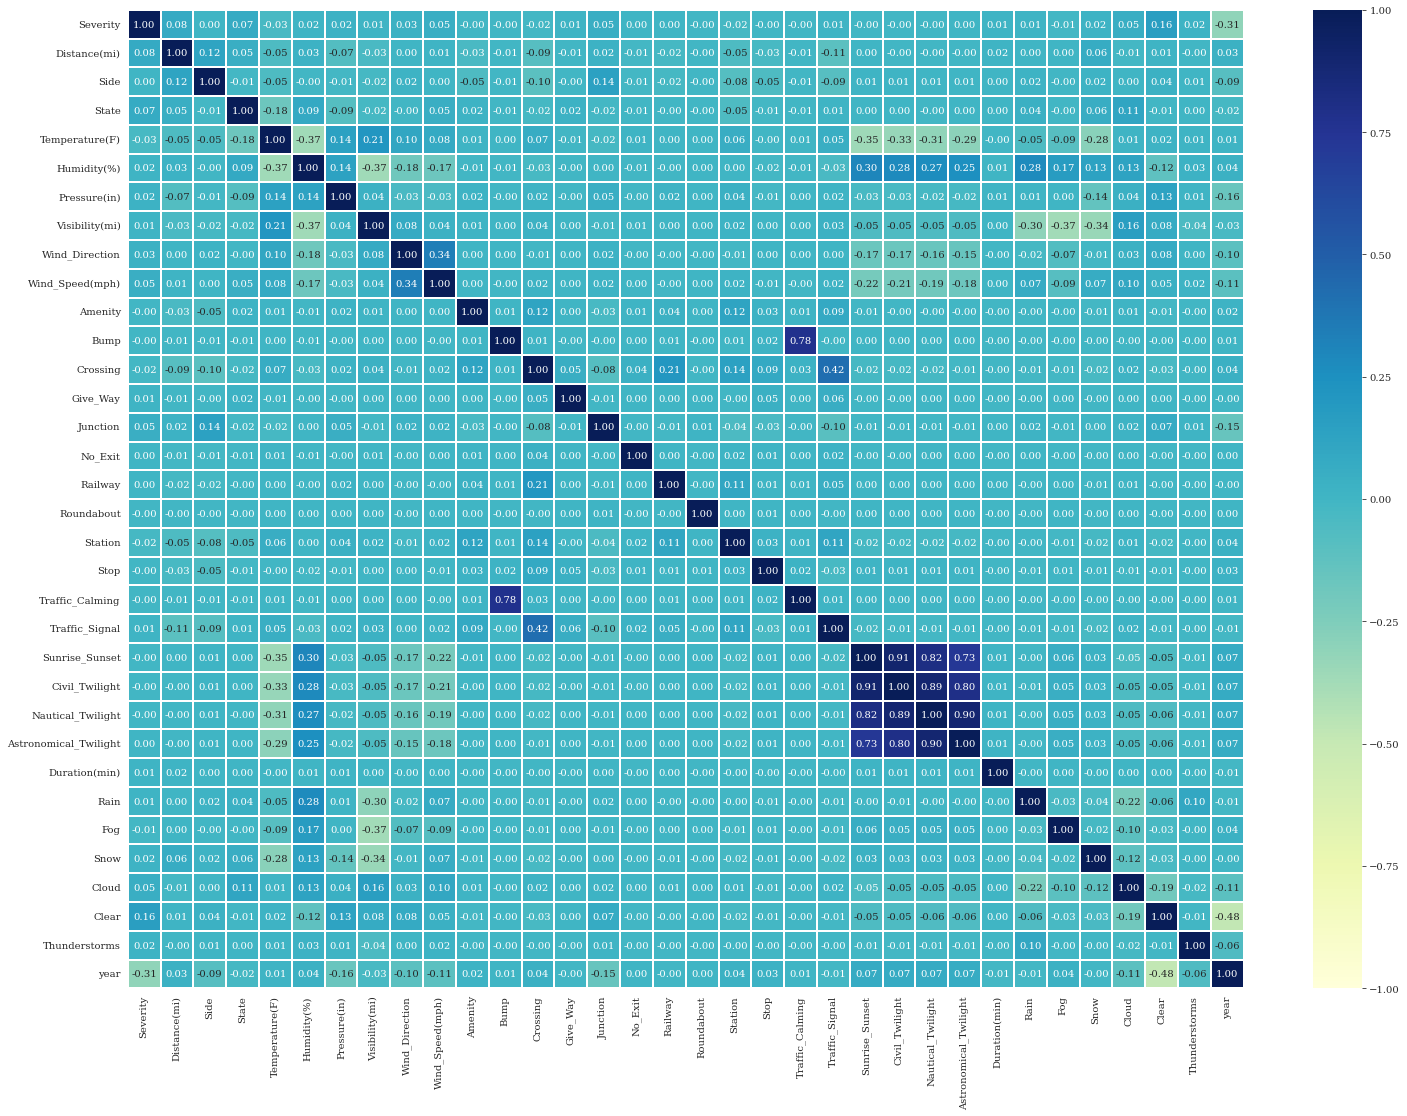

In [ ]:
plt.figure(figsize=(25,18))
sns.heatmap(new_data.corr(),annot=True,linewidths=1,vmin=-1, vmax=1,fmt=".2f",cmap='YlGnBu')

### Split Data

**We use the data before before 2021 to predict data in 2020**

In [ ]:
training_data = new_data[new_data["year"] < 2020].sample(frac = 0.5, random_state = 42)
test_data = new_data[new_data["year"] == 2020].sample(frac = 0.5, random_state = 42)

In [ ]:
training_data = training_data.drop(['year'], axis = 1)
test_data = test_data.drop(['year'], axis = 1)

In [ ]:
# data shape
print(f'Training data: {training_data.shape}')
print(f'Testing data: {test_data.shape}')

Training data: (301348, 33)
Testing data: (298659, 33)


In [ ]:
X_train, y_train = training_data.drop(columns=['Severity']), training_data['Severity']
X_test, y_test = test_data.drop(columns=['Severity']), test_data['Severity']

## Models selection

In this part, we will calculate feature weights and find feature importance since we want to study the most related independent variable to the severity. What's more, we will find the best severity prediction model.

### The first method is to use Logistic Regression to get feature importance by using model's coefficients

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={'Feature': X_train.columns,'Weight': np.abs(model.coef_[0])})
importances = importances.sort_values(by='Weight', ascending=False)

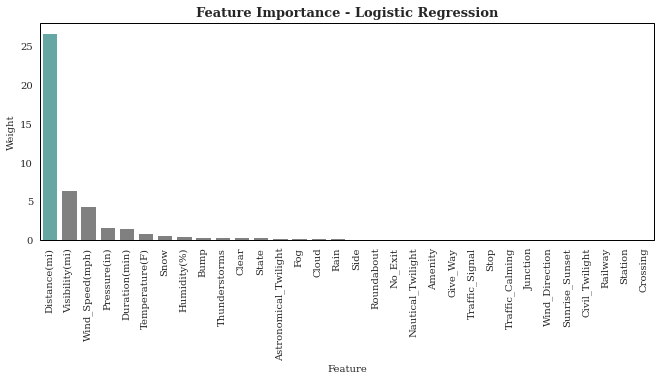

In [ ]:
plt.figure(figsize = (11,4))
clrs = ['gray' if (x < max(importances['Weight'].to_list())) else '#5CB2AC' for x in importances['Weight'].to_list()]
plot = sns.barplot(x="Feature", y="Weight", data=importances,palette=clrs)
plot.patch.set_edgecolor('black')  
plot.patch.set_linewidth(1)
plt.xticks(rotation=90)
plt.title(f'Feature Importance - Logistic Regression',fontweight='heavy',fontsize=13)
plt.show()

Through the Logistic Regression method, we can see that `Clear` has the highest weight, which means that it contributes most in the dataset.

In [ ]:
yhat_log = model.predict(X_test)
print(classification_report(yhat_log, y_test))

              precision    recall  f1-score   support

           1       0.98      0.90      0.94    293522
           2       0.00      0.29      0.00       178
           3       0.06      0.13      0.08      4959

    accuracy                           0.88    298659
   macro avg       0.35      0.44      0.34    298659
weighted avg       0.97      0.88      0.92    298659



### The second method is to use Random Forest Regressor 

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
importances = pd.DataFrame(data={'Feature': X_train.columns,'Weight': np.abs(model.feature_importances_)})
importances = importances.sort_values(by='Weight', ascending=False)

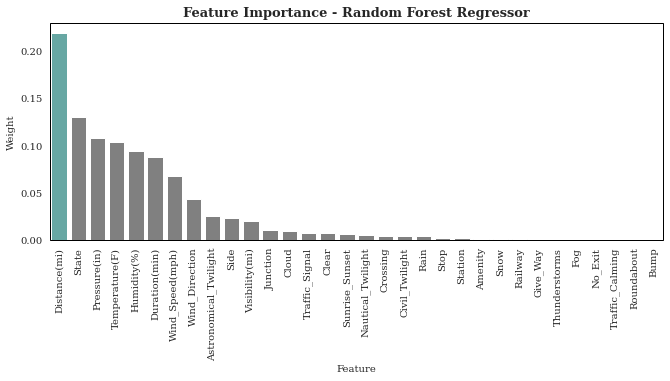

In [ ]:
plt.figure(figsize = (11,4))
clrs = ['gray' if (x < max(importances['Weight'].to_list())) else '#5CB2AC' for x in importances['Weight'].to_list()]
plot = sns.barplot(x="Feature", y="Weight", data=importances,palette=clrs)
plot.patch.set_edgecolor('black')  
plot.patch.set_linewidth(1)
plt.xticks(rotation=90)
plt.title(f'Feature Importance - Random Forest Regressor',fontweight='heavy',fontsize=13)
plt.show()

By applying the random forest regressor, we can see that at this time `Distance(mi)` contributes the most but `Clear` also has acceptable contributions based on this method.

### PCA

In [ ]:
pca = PCA().fit(X_train)

In [ ]:
labels = [p for p in range(1,len(pca.explained_variance_ratio_.cumsum())+1)]
importances = pd.DataFrame(data={'PCA': labels,'explained_variance': pca.explained_variance_ratio_.cumsum()})

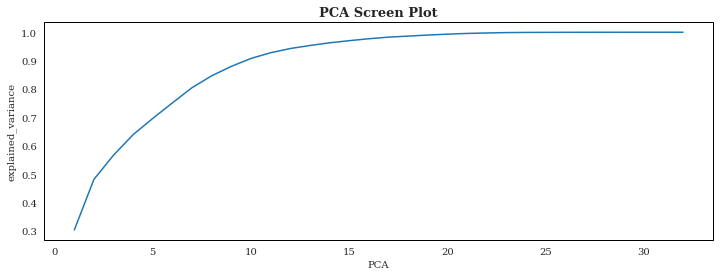

In [ ]:
plt.figure(figsize = (12,4))
plot = sns.lineplot(x = "PCA", y = "explained_variance", data=importances);
plot.patch.set_edgecolor('black')  
plot.patch.set_linewidth(1)
plt.title(f'PCA Screen Plot',fontweight='heavy',fontsize=13)
plt.show()

In [ ]:
PCA_loading = pd.DataFrame(data=pca.components_.T*np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, X_train.shape[1] + 1)], 
    index= X_train.columns)
PCA_loading.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
Distance(mi),0.000240,0.000205,-0.000436,-0.000181,0.000683,-0.000943,-0.000273,-0.000300,-0.000085,-0.000316,0.000355,0.000031,-0.000024,0.000459,-0.000175,0.000032,0.000019,0.000029,-0.000017,-0.000049,-0.000073,1.095441e-05,0.000005,-0.000051,-3.499184e-05,-0.000014,0.000299,0.010979,-1.098167e-05,-6.260093e-05,-6.921631e-05,1.057130e-06
Side,-0.005919,-0.000755,-0.137962,0.027164,-0.040514,-0.102654,-0.203321,0.161915,-0.004860,0.003611,0.004040,0.001423,0.000054,-0.000777,0.002892,-0.000059,0.002576,-0.000046,-0.000420,0.000492,0.000469,3.857109e-07,-0.000131,0.000021,8.588286e-07,0.000001,0.000017,-0.000010,-1.582300e-06,3.433606e-07,-4.528701e-08,-1.538133e-07
State,0.003284,-0.045733,0.038022,0.026358,0.223470,-0.184076,0.082673,0.043575,-0.021931,0.059367,-0.010456,-0.003127,0.000661,-0.006913,0.000742,0.000065,0.000442,-0.001104,0.000379,-0.000367,-0.002170,-1.245423e-04,-0.000215,0.000011,-2.428940e-06,0.000005,-0.000070,-0.000021,6.244743e-07,-4.308150e-07,-3.651224e-06,-3.215286e-07
Temperature(F),-0.024785,0.004313,-0.004215,-0.010413,-0.011542,0.014459,-0.007625,0.000321,-0.011467,0.009098,-0.026799,-0.001214,-0.000838,-0.016267,-0.001266,0.001510,-0.001244,-0.008489,-0.000115,-0.001092,-0.066879,-5.631013e-03,-0.000404,-0.000124,-2.422894e-06,0.000006,0.000089,-0.000002,-1.898482e-06,5.672052e-07,1.933332e-05,-1.117364e-07
Humidity(%),0.062507,-0.049194,0.008576,0.084562,0.013248,-0.049089,0.040223,0.012712,0.048150,-0.130256,0.125583,0.003200,-0.005478,-0.036514,0.000729,0.001103,0.000198,-0.008980,0.000880,0.000114,-0.006970,-6.037422e-04,-0.000050,0.000009,-6.501298e-06,0.000435,0.000152,-0.000015,-1.279683e-06,-5.383790e-10,1.906171e-05,-1.590953e-07


We can now try different principal components to see feature importance.

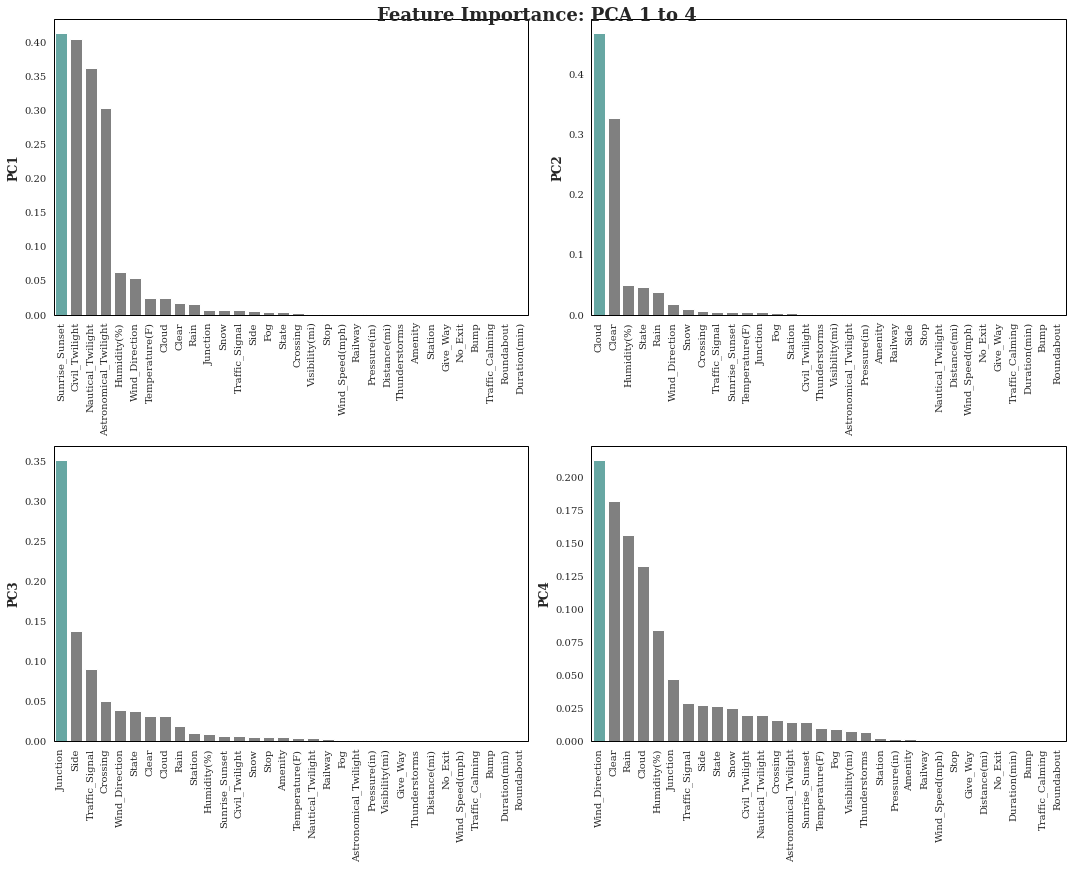

In [ ]:
def pca_plot(start,end):
    plt.figure(figsize = (15, 12))
    sub_plot = 0
    
    for column in PCA_loading.columns.to_list()[start:end]:
        ax = plt.subplot(2, 2, sub_plot+1)
        pc_table = pd.DataFrame(PCA_loading[column])
        pc_table[column] = np.abs(pc_table[column])
        pc_table = pc_table.sort_values(by=column, ascending=False)
        
        clrs = ['gray' if (x < max(pc_table[column].to_list())) else '#5CB2AC' for x in pc_table[column].to_list()]
        plot = sns.barplot(x=pc_table.index, y=column, data=pc_table,palette=clrs)
        plot.patch.set_edgecolor('black')  
        plot.patch.set_linewidth(1)
        plt.xticks(rotation=90)
        plot.set_ylabel(column, fontsize = 12, fontweight='heavy')
        sub_plot += 1
    
    plt.suptitle(f'Feature Importance: PCA {start+1} to {end}', 
             fontweight='heavy',fontsize=18,y=1.002) 
    plt.tight_layout()
    plt.show()

pca_plot(0,4)

### Model 3 - ANN

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(units = 32, activation = 'relu', input_dim = 32))
nn_model.add(Dense(units = 16, activation = 'relu'))
nn_model.add(Dense(units = 8, activation = 'relu'))
nn_model.add(Dense(units = 4, activation = 'softmax'))
# nn_model.add(Dense(units = 1, activation = 'sigmoid'))

nn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = nn_model.fit(X_train.astype('float'), to_categorical(y_train), 
                       validation_data = (X_test.astype('float'), 
                        to_categorical(y_test)), batch_size = 1000, epochs = 10)

Epoch 1/10
302/302 [==============================] - 3s 5ms/step - loss: 0.8480 - accuracy: 0.6781 - val_loss: 0.5008 - val_accuracy: 0.8953
Epoch 2/10
302/302 [==============================] - 2s 5ms/step - loss: 0.7341 - accuracy: 0.7286 - val_loss: 0.5082 - val_accuracy: 0.8952
Epoch 3/10
302/302 [==============================] - 2s 5ms/step - loss: 0.7236 - accuracy: 0.7290 - val_loss: 0.4769 - val_accuracy: 0.8947
Epoch 4/10
302/302 [==============================] - 2s 5ms/step - loss: 0.7123 - accuracy: 0.7300 - val_loss: 0.4807 - val_accuracy: 0.8899
Epoch 5/10
302/302 [==============================] - 2s 5ms/step - loss: 0.6995 - accuracy: 0.7317 - val_loss: 0.5048 - val_accuracy: 0.8744
Epoch 6/10
302/302 [==============================] - 2s 5ms/step - loss: 0.6896 - accuracy: 0.7339 - val_loss: 0.4773 - val_accuracy: 0.8785
Epoch 7/10
302/302 [==============================] - 2s 5ms/step - loss: 0.6824 - accuracy: 0.7362 - val_loss: 0.5069 - val_accuracy: 0.8555
Epoch 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Evaluation

In [ ]:
yhat_test = np.argmax(nn_model.predict(X_test), axis=1)

9334/9334 [==============================] - 18s 2ms/step


In [ ]:
# Accuracy of the model
accuracy = accuracy_score(y_test, yhat_test)
print('Accuracy: ', accuracy)

Accuracy:  0.8349656296980837


#### Fitting graph

[]

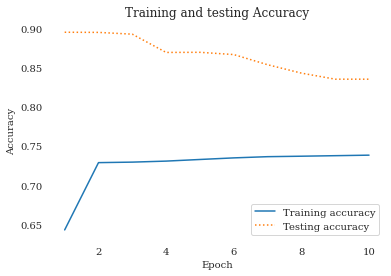

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Testing accuracy')
plt.title('Training and testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

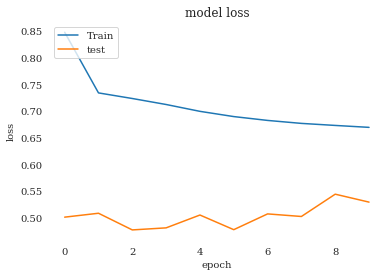

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'test'], loc='upper left')
plt.show()

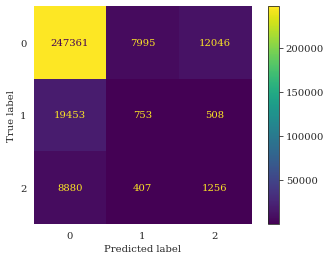

In [ ]:
cm = confusion_matrix(y_test,yhat_test)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=cm)
mycmdisp.plot()

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           1       0.90      0.93      0.91    267402
           2       0.08      0.04      0.05     20714
           3       0.09      0.12      0.10     10543

    accuracy                           0.83    298659
   macro avg       0.36      0.36      0.35    298659
weighted avg       0.81      0.83      0.82    298659



# <div style="font-family: Trebuchet MS; background-color: #5CB2AC; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Reference </div>

1. https://betterdatascience.com/feature-importance-python/